## Assignment #3

* Release date: 2020/05/20
* Due date: **2020/05/27 23:59** (will not accept late submission)
* Submittion format: notebook file which can be executed in Colab environment
* Weighting: 6% (total 60 pts)

* We will train CNN using `dogs_vs_cats_subset.zip` distributed in the class.

> ### (5pts) Prepare the dataset

* Place the unzipped files in some directory on your Colab instance.
* Count the number of JPEG files in `train`, `validation`, and `test` folders.

In [2]:
from google.colab import drive

#mount Google Drive
drive.mount('/content/gdrive')

#unzip(압축풀기)
import zipfile, os, shutil

dataset='/content/gdrive/My Drive/Lecture/dogs_vs_cats_subset.zip'
dst_path='/content/dogs_vs_cats_subset'
dst_file=os.path.join(dst_path, 'dogs_vs_cats_subset.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

#copy zip file
shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file,'r') as file:
  file.extractall(dst_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
train_cats_dir=os.path.join(dst_path, 'subset/train/cats')
train_dogs_dir=os.path.join(dst_path, 'subset/train/dogs')

validation_cats_dir=os.path.join(dst_path, 'subset/validation/cats')
validation_dogs_dir=os.path.join(dst_path, 'subset/validation/dogs')

test_cats_dir=os.path.join(dst_path, 'subset/test/cats')
test_dogs_dir=os.path.join(dst_path, 'subset/test/dogs')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


> ### (20pts) Build the network

* **(10pts)** Build a convolutional neural network having the following layers.
  * Assume that the input of size (150, 150) and `relu` activations
  * Preserve spatial resolution of input tensor by padding
  * Layer 1: convolutional layer with kernel size 5, stride 2, 16 filters
  * Layer 2: convolutional layer with kernel size 3, stride 2, 16 filters
  * Layer 3: convolutional layer with kernel size 3, stride 2, 16 filters
  * Layer 4: convolutional layer with kernel size 3, stride 2, 32 filters
  * Layer 5: convolutional layer with kernel size 3, stride 2, 32 filters
  * Layer 6: fully connected layer with 64 hidden nodes
  * Layer 7: (output layer) fully connected layer with **2 output nodes**
  * Others not specified should be chosen yourself.

In [4]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(2,2), padding='same', input_shape=(150, 150, 3)))#컬러이미지이므로 3 channel
model.add(layers.Conv2D(16, (3,3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.Conv2D(16, (3,3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.Conv2D(32, (3,3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.Conv2D(32, (3,3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

Using TensorFlow backend.


* Print the summary of model.
* **(10pts) Explain** how to compute the total number of trainable parameters.

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

(Explain how to compute the total number of trainable parameters)

1.Convolution layer trainable parameters

= (shape of width of filter * shape of height filter * number of filters in the previous layer + 1) * number of filters

  * conv2d_12 = (5 * 5 * 3 + 1) * 16 = 1216
  * conv2d_13 = (3 * 3 * 16 + 1) * 16 = 2320
  * conv2d_14 = (3 * 3 * 16 + 1) * 16 = 2320
  * conv2d_15 = (3 * 3 * 16 + 1) * 32 = 4640
  * conv2d_16 = (3 * 3 * 32 + 1) * 32 = 9248


2.Dense layer trainable parameters

= output_size * (input_size + 1)

 * dense_5 = 64 * (800 + 1) = 51264
 * dense_6 = 2 * (64 + 1) = 130

→ total of trainable parameters = 71138

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

> ### (20pts) Preprocess 

  * Currently, the data is stored as JPEG files. So we need the following steps:
    * Read the picture files.
    * Decode the JPEG content to RGB grids of pixels.
    * Convert these into floating-point tensors.
    * Normalize the data to have zero mean and unit variance.
      * Assume that the mean vector of training data is [123.68, 116.779, 103.939]. Here, each value represents the mean for each channel.
      * Also, we know that the std vector of training data is [58.40, 57.12, 57.38]. Again, each value represents the std for each channel. 
      * You should normalize the input data using the above statistics, i.e., input[channel] = (input[channel] - mean[channel]) / std[channel].
      * TIP: google "keras imagedatagenerator normalization" and/or refer to Keras documentation.
      * Note that the validation and test data should be normalized using the statistics calculated from the training dataset.
    
  * Make `ImageDataGenerator` instances for the training and validation dataset respectively to obtain batches of preprocessed tensors.
    * Set `batch_size` to 20.


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

channel_mean = [123.68, 116.779, 103.939]
channel_std = [58.40, 57.12, 57.38]
               
def normalize(image):
  for i in range(len(channel_mean)):
    mean = channel_mean[i]
    std = channel_std[i]
    image[:,:,i] = tf.convert_to_tensor(image[:,:,i], dtype=tf.float32)
    image[:,:,i] = (image[:,:,i]-mean)/std
  return image

train_dir = os.path.join(dst_path, 'subset/train')
validation_dir = os.path.join(dst_path, 'subset/validation')

train_datagen = ImageDataGenerator(rescale=None, preprocessing_function = normalize)
test_datagen = ImageDataGenerator(rescale=None, preprocessing_function = normalize)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='categorical')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('data batch type:', data_batch.dtype)
  print('labels batch shape:', labels_batch.shape)
  print('labels batch type:', labels_batch.dtype)
  break

data batch shape: (20, 150, 150, 3)
data batch type: float32
labels batch shape: (20, 2)
labels batch type: float32


In [9]:
print(data_batch[0].shape, data_batch[0])

(150, 150, 3) [[[ 0.4506849   0.7741772   0.26247817]
  [ 0.6904109   1.0367823   0.41932723]
  [ 0.65616435  1.0017682   0.34961653]
  ...
  [ 0.15958904  0.38902313 -0.19064139]
  [-0.09726027  0.14392509 -0.5217672 ]
  [ 0.27945206  0.3365021   0.05334606]]

 [[ 0.4849315   0.7916842   0.41932723]
  [ 0.67328763  1.0017682   0.5238933 ]
  [ 0.5876712   0.9142332   0.40189955]
  ...
  [ 1.3239726   1.3694153   1.2035726 ]
  [ 1.289726    1.3344012   1.0990065 ]
  [ 1.3582191   1.4569503   1.3778493 ]]

 [[ 0.17671232  0.49406514  0.19276746]
  [ 0.4506849   0.7916842   0.3844719 ]
  [ 0.55342466  0.8967262   0.41932723]
  ...
  [ 2.1116438   2.1572304   2.2318056 ]
  [ 2.0260274   2.0696955   2.1446671 ]
  [ 1.9917808   2.1047094   2.1620948 ]]

 ...

 [[ 1.1013699   1.0367823   0.41932723]
  [ 1.5465753   1.5970063   0.94215745]
  [ 1.4952054   1.5970063   0.88987446]
  ...
  [ 0.3308219   0.42403713 -0.01636464]
  [-0.28561643 -0.20621498 -0.6437609 ]
  [ 0.03972602  0.19644609 -0.

> ### (5pts) Train the network

* Train the network for 50 epochs. It may consume some time. Note that you should set `steps_per_epoch` and `validation_steps` properly so that a particular data is processed once during a single epoch.

In [10]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,                              
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/50
100/100 [==============================] - 16s 158ms/step - loss: 0.6873 - acc: 0.5320 - val_loss: 0.6634 - val_acc: 0.5470
Epoch 2/50
100/100 [==============================] - 10s 103ms/step - loss: 0.6688 - acc: 0.6050 - val_loss: 0.6618 - val_acc: 0.5790
Epoch 3/50
100/100 [==============================] - 10s 101ms/step - loss: 0.6497 - acc: 0.6255 - val_loss: 0.6164 - val_acc: 0.6020
Epoch 4/50
100/100 [==============================] - 10s 102ms/step - loss: 0.6321 - acc: 0.6360 - val_loss: 0.5221 - val_acc: 0.6060
Epoch 5/50
100/100 [==============================] - 10s 102ms/step - loss: 0.6202 - acc: 0.6515 - val_loss: 0.5912 - val_acc: 0.6130
Epoch 6/50
100/100 [==============================] - 10s 103ms/step - loss: 0.6057 - acc: 0.6705 - val_loss: 0.3971 - val_acc: 0.6250
Epoch 7/50
100/100 [==============================] - 10s 102ms/step - loss: 0.5922 - acc: 0.6835 - val_loss: 0.5969 - val_acc: 0.6270
Epoch 8/50
100/100 [==============================] - 1

> ### (10pts) Plot training and validation accuracy

* (5pts) Plot training and validation accuracy. 

<Figure size 432x288 with 0 Axes>

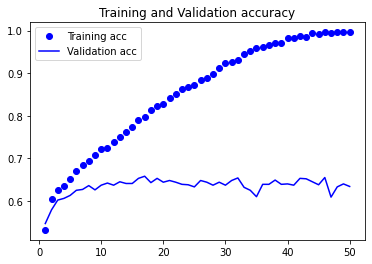

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

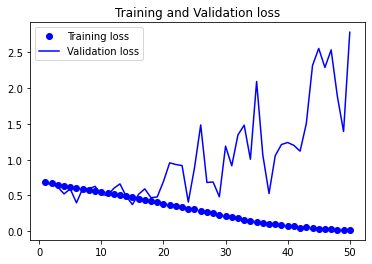

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

  * (5pts) You will probably observe the overfitting in loss although the accuracy converges well. Explain how this happens.

Overfitting is caused by having too few samples to learn. So it's unable to train a model that can generalize to new data.

We can solve this problem with Data augmentation. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations.